![](chapter-2-cover.png)

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import expit
from math import exp

# Chapter 2: The Law of Diminishing Returns

> *Keywords for this chapter: Diminishing Returns, Marginal Returns, Marginal ROAS, Market Saturation, Elasticity*

## The Non-linearity of Investments

An interesting behavior can be noticed on the $\text{ROAS}$ calculation: we expect that the $\text{CLV}$ of our customers is stable, whilst this is not the same for the $\text{CAC}$. Consequently, there is a point at which investing more will give no returns, for instance, when $\text{ROAS} <1$. That's exactly why our $\text{ROAS}$ will tend to zero.

Several economists have studied why that is the case, but one known factor is marketing saturation. An interesting case that illustrates this is what happened to a magazine called *Sports Illustrated* published for the first time in 1954. Since its first publication, it started to increase until reached 3.5 million subscribers by the end of the 1980s. One can imagine that decades later it may have doubled the amount of subscribers. Interestingly, after many years of investment, it reached its natural limit (3.5 million) where it remained at least until the 2000s. Thomas G. Osenton author of *Death of Demand* explains this very briefly:

```{epigraph}
"Every product or service has a natural consumption level. We just don't know what it is until we launch it, distribute it, and promote it for a generation's time (20 years or more) after which further investment to expand the universe beyond normal limits can be a futile exercise."

— Thomas G. Osenton
```

We cannot expect to keep investing and receiving a proportional return always, which means that the relationship between our investment and return is not linear (e.g. $\text{baseline} + \text{investment} \times \text{return rate}$). In reality, we expect the returns to diminish after some time, because we have saturated the market, otherwise our revenue would grow towards infinity. Equation 1.6 shows that expected behavior, with $\text{CAC}$ increasing and our $\text{CLV}$ remaining roughly the same, the total return over our investment will diminish towards zero. Therefore, if we plot the total return explained by our investment, we'll see the function reaching a horizontal asymptote as our investment grows towards infinity.

On the other hand, there are also cases where too few investments lead to lower returns than expected. An example of this is what happens in online marketing, which often uses a bidding system to determine who will see which advertisement. In such a scenario, an underinvested campaign may suffer due to high competition, since it will lose most of the bids. This will lead to low returns at low investment levels.

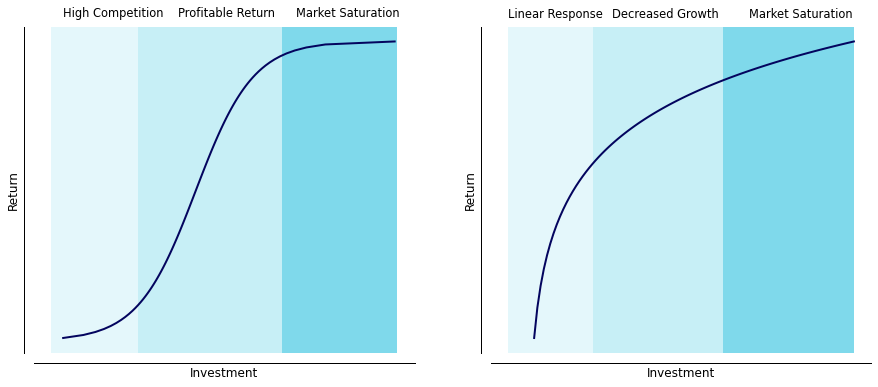

In [40]:
x = np.linspace (0.01, 0.999, num=100)
y = np.log (x/(1-x))
 
x_new = y
y_new = expit(x_new)

x_concave = np.linspace(1, 50, num=100)
y_concave = np.emath.logn(1.5, x_concave)

fig, axes = plt.subplots(figsize=(15,6), ncols=2, sharex=False, sharey=False)
axes[0].plot(x_new, y_new, linewidth=2, color='#03045E')
axes[0].axvspan(-5, -2, facecolor='#CAF0F8', alpha=0.5)
axes[0].axvspan(-2, 3, facecolor='#90E0EF', alpha=0.5)
axes[0].axvspan(3, 7, facecolor='#00B4D8', alpha=0.5)
axes[0].set_xlabel('Investment', fontsize=12)
axes[0].set_ylabel('Return', fontsize=12)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].text(-4.6, 1.08, 'High Competition', fontsize=11.5)
axes[0].text(-0.6, 1.08, 'Profitable Return', fontsize=11.5)
axes[0].text(3.5, 1.08, 'Market Saturation', fontsize=11.5)

axes[1].plot(x_concave, y_concave, linewidth=2, color='#03045E')
axes[1].set_xlabel('Investment', fontsize=12)
axes[1].set_ylabel('Return', fontsize=12)
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].axvspan(-3, 10, facecolor='#CAF0F8', alpha=0.5)
axes[1].axvspan(10, 30, facecolor='#90E0EF', alpha=0.5)
axes[1].axvspan(30, 50, facecolor='#00B4D8', alpha=0.5)
axes[1].text(-3, 10.4, 'Linear Response', fontsize=11.5)
axes[1].text(13, 10.4, 'Decreased Growth', fontsize=11.5)
axes[1].text(34, 10.4, 'Market Saturation', fontsize=11.5)
sns.despine(offset=10, trim=True)
sns.set_context("paper")
plt.savefig('./fig/21.jpg', dpi=200, bbox_inches='tight')
plt.show()

:::{figure-md} markdown-fig
![investmentxreturn](./fig/21.jpg)

Left: S-shaped curve, represents businesses that have a slower growth at a low level of investments, increase quickly, and then saturate. Right: The concave curve represents businesses that grow quickly at the first investments but after a certain amount of investment grow at a decreasing rate.
:::

We can exemplify this with the curves shown in Fig 3, in each case there can be seen a point on which investing further will give not much more return when compared with keeping the investment as it is. In both cases, there is a point on which the market is saturated and the $\text{ROAS}$ is not as it was when we started to invest. That makes sense, in most cases, when we start to invest the first people to convert are the ones that are more prone to be customers, meaning that they have a lower $\text{CAC}$. Similarly, we expect that as we keep investing, the easily converted customers will already be converted, leaving only customers that cannot be converted as easily. These will require more effort (e.g. being exposed to an advertisement more times) which in turn means a higher $\text{CAC}$.

This behavior can be derived from the definition of $\text{CAC}$ in equation 1.2. For example, we can assume that we do not have a limit on the amount that we can invest, however, there is a limit to the number of people that we can convert (e.g. the number of people on earth). Therefore, if we take the limit on both factors, $\text{Investment}$ and $\text{CA}$ with these aspects in mind, we'll see that our $\text{CAC}$ tends towards infinity:

```{math}
\tag{2.1}\lim_{(Investment, CA) \to (+\infty, n)} CAC(Investment, CA) = \frac{Investment}{CA} = \frac{\infty}{n} = \infty
```

For $\text{CA}$ being the number of customers acquired, $n$ being any arbitrary maximum number of possible customers, and $\text{CA}, n \in I\!N$.

Naturally, after understanding how returns start to diminish after some time, one can think about when is the best moment to stop investing. To analyze this, we'll introduce a new concept.

## Marginal Returns

The question of whether one should keep investing has an intrinsic relationship with the future. Will I earn more if I invest more? What is the expected return for the next dollar invested? The answer to this question often requires assuming that our $\text{Return}$ function follows a parametric form, that is, a specific shape. Let's take, for instance, the s-shaped growth curve in Fig 3. We can write it, for the sake of simplicity, as the standard logistic function:

```{math}
\tag{2.2} f(x) = \frac{1}{1+e^{-x}} = \frac{e^x}{1+e^x}
```

We can follow the rate of return by taking the first derivative of that same function which will be the following:

```{math}
\tag{2.3} \frac{d}{dx} f(x) = \frac{e^x}{(1+e^x)^2}
```

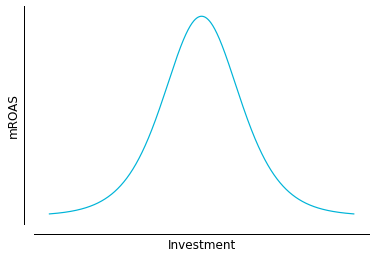

In [95]:
x = np.linspace (-6, 6, num=1000)
y = [exp(i)/((1+exp(i))**2) for i in x]

plt.subplots(figsize=(6,4))
sns.lineplot(x=x, y=y, color='#00B4D8')
plt.xticks([])
plt.yticks([])
plt.xlabel('Investment', fontsize=12)
plt.ylabel('mROAS', fontsize=12)
sns.despine(offset=10, trim=True)
sns.set_context("paper")
plt.savefig('./fig/22.jpg', dpi=200, bbox_inches='tight')
plt.show()

If we plot that function (Fig 4), we can see that our return rate reaches a peak and starts to diminish towards zero.

```{figure} ./fig/22.jpg
---
scale: 40%
align: center
---
Marginal return or marginal ROAS for several investment levels.
```

Now, let's think about these results for a little. When we took the derivative, we made some kind of division, that is:

$$\tag{2.4} \frac{d\text{Return}}{d\text{Investment}}$$

We know from equation 1.4 that the division between our $\text{Return}$ (also called as *campaign revenue*) and our $\text{Investment}$ (also called *campaign spend*) is the definition of $\text{ROAS}$. But what is the difference between the $\text{ROAS}$ and what we just made? If you recall the definition of the derivative, you will remember that it is an infinitesimally small change in the $x$ variable which in turn produces an infinitesimal change in $y$ variable. Therefore, by taking the derivative of the $\text{Return}$ function, we are understanding how changing investment will change $\text{ROAS}$. We call this change in $\text{ROAS}$ the *Marginal ROAS*, which we'll denote as $\text{mROAS}$. We can define our $\text{mROAS}$ as:

$$
\tag{2.5} \text{mROAS} = \lim_{\delta \to 0}\frac{\text{Return}(\text{Investment} + \delta) - \text{Return}(\text{Investment})}{\delta}
$$

The point on the curve on which our $\text{mROAS}=0$ is the moment when there is no change in the return if we increase the investment, meaning that we achieved our saturation point. Note that for several types of curves the exact point on which $\text{mROAS}=0$ (including the one in our example) does not necessarily exist, however, it is important to know the increment that one will have in return if spending more. In case we have to choose between investing in campaign A or campaign B, we'll likely be willing to invest in the one with the highest marginal return.

One important thing to notice is that there is no exact relationship between $\text{mROAS}$ and $\text{ROAS}$ in the sense that we cannot expect our $\text{ROAS}$ to always have a specific value at a given $\text{mROAS}$. This fact shows why it is not advisable to choose an investment based solely on $\text{ROAS}$, because you can have a great $\text{ROAS}$ but be already past the optimal $\text{mROAS}$ threshold.

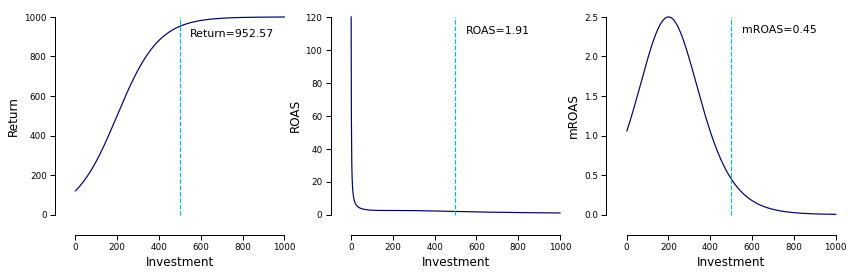

In [171]:
investment = np.linspace (1, 1000, num=1000)
revenue = [1000/(1+exp(-0.01*(i-200))) for i in investment]
roas = revenue/investment
mroas = [10*exp(-0.01*(-200+i))/(1+exp(-0.01*(-200+i)))**2 for i in x]

revenue_500 = 1000/(1+exp(-0.01*(500-200)))
roas_500 = revenue_600/500
mroas_500 = 10*exp(-0.01*(-200+500))/(1+exp(-0.01*(-200+500)))**2

fig, axes = plt.subplots(figsize=(14,4), ncols=3, sharex=True, sharey=False)

axes[0].plot(investment, revenue, color='#03045E')
axes[0].set_xlabel('Investment', fontsize=12)
axes[0].set_ylabel('Return', fontsize=12)
axes[0].vlines(500, 0, 1000, color='#00B4D8', linestyle='--')
axes[0].text(550, 900, f'Return={revenue_500:.2f}', fontsize=11)

axes[1].plot(investment, roas, color='#03045E')
axes[1].set_xlabel('Investment', fontsize=12)
axes[1].set_ylabel('ROAS', fontsize=12)
axes[1].vlines(500, 0, 120, color='#00B4D8', linestyle='--')
axes[1].text(550, 110, f'ROAS={roas_500:.2f}', fontsize=11)

axes[2].plot(investment, mroas, color='#03045E')
axes[2].set_xlabel('Investment', fontsize=12)
axes[2].set_ylabel('mROAS', fontsize=12)
axes[2].vlines(500, 0, 2.5, color='#00B4D8', linestyle='--')
axes[2].text(550, 2.3, f'mROAS={mroas_500:.2f}', fontsize=11)

sns.despine(offset=10, trim=True)
sns.set_context("paper")
plt.savefig('./fig/23.jpg', dpi=200, bbox_inches='tight')
plt.show()

````{prf:example}
Let's say that we have invested $500$ and had $952.57$ back in revenue from it. That is:

```{math}
f(500) = 952.57
```

We can see from this relationship that our $\text{ROAS}$ was:

```{math}
\text{ROAS} = \frac{952.57}{500} = 1.91
```

A common question in this case is: should I invest more? A naive investor should assume that this campaign is highly profitable since we get almost twice the money we spend. However, it depends on the form that we expect our investment-return curve to have. Let's assume in this example that the curve has the following form:

```{math}
f(x) = \frac{1000}{1+e^{-0.01(x-200)}}
```

Assuming that our curve has this specific shape, by taking the first derivative of it we'll visualize the $\text{mROAS}$. Now taking the first derivative:

```{math}
\frac{d}{dx} f(x) = \frac{10 \times \text{exp}(-0.01(-200+x))}{1+\text{exp}(-0.01(-200+x))^2} \newline
```

Now when setting $x:=500$:

```{math}
\frac{10 \times \text{exp}(-0.01(-200+500))}{1+\text{exp}(-0.01(-200+500))^2} = 0.45
```

We can see that even if our campaign returns almost twice what we invested, we are relatively close to our saturation point, since $\text{mROAS} \approx 0$. With this information, we can choose to invest in another campaign on which the $\text{mROAS}$ is greater.

```{figure} ./fig/23.jpg
---
scale: 30%
align: center
---
Return, ROAS, and mROAS for an investment of 500
```

In the figure above we can see the relationship between our $\text{Return}$, $\text{ROAS}$, and $\text{mROAS}$ which may not be obvious at first. However, it is important to state that this is very relative to the shape that we assume our $f(x)$ to have.
````

## Point of Diminishing Returns

Another important point on the curve in Fig 4 is the point of maximum marginal return. We can see that before that given point, the marginal return is increasing, and after that point, it starts to decrease. What is the exact meaning of this threshold? We can this point *the point of diminishing returns* and is the point on which we start to observe our results diminishing.

Obviously, that point depends on the form that we assume our curve to have, and depending on its format, it will not always have a straightforward point of diminishing returns. Why that is the case? Well, the point of diminishing returns is the point on which the curve changes its concavity from up to down, and not all curves have this property (e.g. the curve on the right in Fig 3) since some of them already diminish from the start. However, when this point exists, we can find it by taking the second derivative of the investment-return curve. Let's go back to our example in equation 2.2 and calculate the second derivative of it:

$$
\tag{2.6} \frac{d^2}{dx^2} f(x) = \frac{-e^x \times e^x-1}{(e^x +1)^3}
$$

The point of diminishing returns is the point on which the result of the equation above is zero. If we plot this for the standard logistic curve, well see something as the Fig 6.

```{warning}
For practical reasons, we are assuming that your curve will always be asymptotically increasing, which in reality we expect to be true.
```

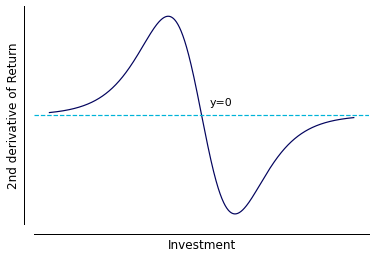

In [197]:
x = np.linspace (-6, 6, num=1000)
y = [-(exp(i)*(exp(i)-1))/(exp(i)+1)**3 for i in x]

plt.subplots(figsize=(6,4))
sns.lineplot(x=x, y=y, color='#03045E')
plt.xticks([])
plt.yticks([])
plt.xlabel('Investment', fontsize=12)
plt.ylabel('2nd derivative of Return', fontsize=12)
plt.axhline(y=0, linestyle='--', color='#00B4D8')
plt.text(.3, 0.01, 'y=0', fontsize=11)
sns.despine(offset=10, trim=True)
sns.set_context("paper")
plt.savefig('./fig/24.jpg', dpi=200, bbox_inches='tight')
plt.show()

```{figure} ./fig/24.jpg
---
scale: 40%
align: center
---
2nd derivative of the return function. The point on which y=0 is the point of diminishing returns
```

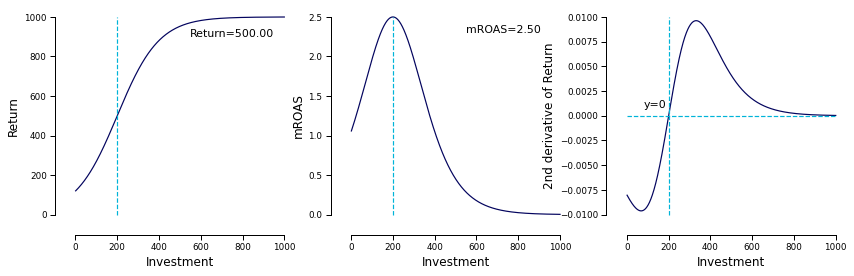

In [225]:
investment = np.linspace (1, 1000, num=1000)
revenue = [1000/(1+exp(-0.01*(i-200))) for i in investment]
mroas = [10*exp(-0.01*(-200+i))/(1+exp(-0.01*(-200+i)))**2 for i in x]
second_derivative = [10*(((0.02*exp(-0.01*(-200+i)))/(1 + exp(-0.01*(-200+i)))**3) - ((0.01*exp(-0.01*(-200+i)))/(1 + exp(-0.01*(-200+i)))**2)) for i in x]

revenue_200 = 1000/(1+exp(-0.01*(200-200)))
mroas_200 = 10*exp(-0.01*(-200+200))/(1+exp(-0.01*(-200+200)))**2

fig, axes = plt.subplots(figsize=(14,4), ncols=3, sharex=True, sharey=False)

axes[0].plot(investment, revenue, color='#03045E')
axes[0].set_xlabel('Investment', fontsize=12)
axes[0].set_ylabel('Return', fontsize=12)
axes[0].vlines(200, 0, 1000, color='#00B4D8', linestyle='--')
axes[0].text(550, 900, f'Return={revenue_200:.2f}', fontsize=11)

axes[1].plot(investment, mroas, color='#03045E')
axes[1].set_xlabel('Investment', fontsize=12)
axes[1].set_ylabel('mROAS', fontsize=12)
axes[1].vlines(200, 0, 2.5, color='#00B4D8', linestyle='--')
axes[1].text(550, 2.3, f'mROAS={mroas_200:.2f}', fontsize=11)

axes[2].plot(investment, second_derivative, color='#03045E')
axes[2].set_xlabel('Investment', fontsize=12)
axes[2].set_ylabel('2nd derivative of Return', fontsize=12)
axes[2].vlines(200, -0.01, 0.01, color='#00B4D8', linestyle='--')
axes[2].hlines(0, 0, 1000, color='#00B4D8', linestyle='--')
axes[2].text(80, 0.0008, 'y=0', fontsize=11)

sns.despine(offset=10, trim=True)
sns.set_context("paper")
plt.savefig('./fig/25.jpg', dpi=200, bbox_inches='tight')
plt.show()

````{prf:example}
Going back to the previous example, we assumed that our $\text{Return}$ function would have the following form:

```{math}
f(x) = \frac{1000}{1+e^{-0.01(x-200)}}
```
We can find its point of diminishing returns, by taking the second derivative of it:

```{math}
\frac{d^2}{dx^2} f(x) = 10\Bigg(\frac{0.02e^{-0.02(-200+x)}}{(1+e^{-0.01(-200+x)})^3} - \frac{0.01e^{-0.02(-200+x)}}{(1+e^{-0.01(-200+x)})^2}\Bigg)
```

Now setting $x:=0$:

```{math}
10\Bigg(\frac{0.02e^{-0.02(-200)}}{(1+e^{-0.01(-200)})^3} - \frac{0.01e^{-0.02(-200)}}{(1+e^{-0.01(-200)})^2}\Bigg) = 200
```

We can see that $200$ is the peak of our $\text{mROAS}$ function, and the point on our $\text{Return}$ function on which its curvature changes.

```{figure} ./fig/25.jpg
---
scale: 30%
align: center
---

Point of diminishing returns for an s-shaped curve.
```
````

The point of diminishing returns is not necessarily the point on which we must stop investing further, however, it is important to know when we expect our returns to start to diminish. Treat it like the peak of a roller coaster, it is a worth to remembered moment, but doesn't mean that the ride is over yet.

## Advertising Elasticity of Return

The last important concept that we'll describe is related to how much more $\%\text{Return}$ we expect back if we increase a given $\%\text{Investment}$. When we are interested in measuring the responsiveness of one variable over another, we are talking about measuring our elasticity. In our case, for instance, one can imagine: if I increase my $\text{Investment}$ in $1\%$, what will be the response in $\text{Return}$?

To measure the elasticity, that is, the responsiveness of our curve, we must have a starting point in $\text{Investment}$ from which we want to move on. From that point, we measure the difference between our starting point and the desired point of investment, $\Delta\text{Investment}$, and the difference between the $\text{Return}$ at that point and the desired point, $\Delta\text{Return}$. With that information, we calculate the elasticity as:

$$
\tag{2.7} \epsilon = \frac{\frac{\Delta\text{Return}}{\text{Return}}}{\frac{\Delta\text{Investment}}{\text{Investment}}} = \frac{\Delta\text{Return}}{\text{Return}}\frac{\text{Investment}}{\Delta\text{Investment}}
$$

We expect that since our $\text{Return}$ function is asymptotically increasing, our $\epsilon \in [0, +\infty)$. Below we can find a table that will help to interpret the resultant elasticity.

`````{admonition} How to interpret $\epsilon$
:class: tip

When $\epsilon = 0$:
  - That means that the $\Delta\text{Return} = 0$, that is, we had no change when increasing the $\text{Investment}$. It means that there is no advantage in increasing the investment since there was no response.

When $0 \lt \epsilon \lt 1$
  - A moderate response, that means that $\Delta\text{Return} \gt 0$. However, the $\%\text{Return}$ increased was lower than $\%\text{Investment}$ increased.
  
When $\epsilon = 1$
  - An exact response of the increase in $\%\text{Investment}$ and the increase in $\%\text{Return}$. This is expected as we get closer to the point of diminishing returns.

When $\epsilon \gt 1$
  - Means that the increase in $\%\text{Return}$ was greater than increase in $\%\text{Investment}$. This is the best scenario for investing, and it is expected way before the point of diminishing returns.

One may interpret this as: if I increase investment by 1% the revenue will increase by $\epsilon$%
`````

````{prf:example}
Let's take the values that we observed in the previous examples in this chapter and calculate the elasticity for them. First, let's say that we want to move from investing $150$ to $200$:

```{math}
\Delta\text{Investment} = 200 - 150 = 50
```

```{math}
\Delta\text{Return} = 500 - 377.54 = 122.45
```

Then our elasticity is:

```{math}
\epsilon = \frac{122.45}{377.54} \frac{150}{50} \approx 0.97
```

We see a good responsiveness, which is expected, but since we are close to the point of diminishing returns our $\epsilon < 1$ . 

Now let's simulate moving from investing $550$ to $600$:

```{math}
\Delta\text{Investment} = 600 - 550 = 50
```

```{math}
\Delta\text{Return} = 982.01 - 970.68 = 11.32
```

Then our elasticity is:

```{math}
\epsilon = \frac{11.32}{970.68} \frac{550}{50} \approx 0.12
```

The responsiveness is not so good as we see when comparing to moving from $150$ to $200$. This happens because we are far off from the point of diminishing returns.

````

Elasticity is very useful when deciding to increase investment in a marketing campaign. However, there are a couple of factors that may affect the elasticity such as:

- How new the product/service is to the market

- Quality of advertisement

- Advertisement by competitors


## Conclusion

We started by understanding that the return on investment is not linear since we expect a saturation effect. Afterwards we understood the effect of diminishing returns and how the marginal return on spend $\text{(mROAS})$ reflect the return saturation. We learned how to find the point on which our returns start to diminish and how to measure the responsiveness of an increase in $\text{Investment}$.

You might be wondering how to calculate your own $\text{Return}$ curves, which is an important topic that will be covered later. However, firstly we must be able to correctly attribute a sale (or any success event) to the correct marketing campaign. Therefore, we'll take a look at how attribution models work.

**Bibliography:**

1. Osenton, T. (2004). The Death of Demand: Finding Growth in a Saturated Global Economy. Financial Times Prentice Hall.

2. Pandey, Sandeep & Gupta, Snigdha & Chhajed, Shubham. (2021). Marketing Mix Modeling (MMM) -Concepts and Model Interpretation. International Journal of Engineering and Technical Research. 10. 784. 10.17577/IJERTV10IS060396. 